In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gp
from datetime import datetime

In [108]:
def plot_chicago(counts):
    #expects geopandas dataframe with chicago boundary information
    #and counts as a pandas dataframe
    chicago=gp.read_file('/media/benjamin/Data/Chicago_Transit/Shapes/geo_export_43aec312-120e-4284-b1ca-b89761679d63.shp')
    chicago['pickup community area']=chicago['area_num_1'].astype(np.int32)
    with_count=chicago.merge(counts,on='pickup community area',how='left')
    fix, ax = plt.subplots(1,1) 
    with_count.plot(column='count',vmin=0,vmax=100,ax=ax,legend=True,legend_kwds={'label':'Pickup Count'})
    return with_count

def predict(time):
    index=np.ndarray(77)
    area_counts=np.ndarray(77)
    d={'time':datetime.strptime(time,"%Y-%m-%d-%H")}
    julday=pd.DataFrame(data=d,index=[0]).set_index('time').index.to_julian_date()[0]
    coeffs=np.load('NbdModels.npy')
    for i in np.arange(0,77):
        int_i=int(i)
        index[int_i]=int_i+1
        area_counts[int_i]=coeffs[0,int_i]*np.sin(2.*3.14159*julday*2.)+coeffs[1,int_i]*np.cos(2.*3.14159*julday*2.)+coeffs[2,int_i]*np.sin(2.*3.14159*julday)+coeffs[3,int_i]*np.cos(2.*3.14159*julday)+coeffs[4,int_i]*np.sin(2.*3.14159*julday/7.)+coeffs[5,int_i]*np.cos(2.*3.14159*julday/7)+coeffs[6,int_i]
   
    counts=pd.DataFrame(data=np.column_stack([index,area_counts]),columns=['pickup community area','count'])
    #return counts    
    merged=plot_chicago(counts)
    merged=merged.sort_values(['count'],ascending=False).head()
    merged=merged[['community','count']]
    return merged

,community,count
74,OHARE,101.721102
37,LOOP,71.247046
28,NEAR WEST SIDE,57.233146
75,EDGEWATER,52.123534
69,AUBURN GRESHAM,49.477608


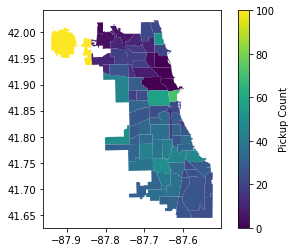

In [109]:
#Please enter a date below in the format 'YYYY-MO-DY-HR', then run the cell.
time = '2021-02-13-07'
merged=predict(time)
merged.head(5)